In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import sys
import os
if "../" not in sys.path:
  sys.path.append("../") 
import os
os.chdir("..") 
from envs.data_handler import DataHandler
import envs.data_utils as du

# Non-stationary data generation

In [2]:
def create_datafile_name(model, component_id, transformation, distinguishable):
    component_identifier = '_id' if component_id else ''
    dist = '_dist' if distinguishable else ''
    return 'data/prepared_data/' + model + component_identifier + '_' + transformation + dist + '.csv'

def create_non_stationary_data(model, dist=False):
    trans = ['raw', 'cube', 'sqt', 'log10', 'ln', 'log2']
    for t in trans:
        print('Generating for ' + t)
        dh = DataHandler(data_generation='LinearShifted', take_component_id=True, transformation=t, distinguishable=dist)
        non_stationary_data_ARCH = du.create_non_stationary_data(model, dh.data)
        non_stationary_data_ARCH.to_csv(create_datafile_name(model, True, t, dist))

## ARol
Create non-stationary data using the AR Model with a Ornstein–Uhlenbeck procedure model. A series value $x$ at time point $t$ for a <component,failure> group is calculated by:
\begin{align}
x_{t} = x_{t-1} + 0.1 * (\mu * x_{t-1}) + rand(\mathcal{N}))
\end{align}
where $\mu$ is the mean of <component,failure> and $rand(\mathcal{N})$ is a random value from a normal distribution.


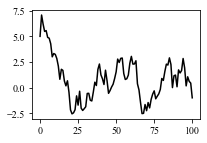

In [26]:
y = du.ARol(5, 0, 100)
x = range(len(y)) 
plt.figure(figsize=[3, 2])
plt.plot(x, y, color='black')
plt.savefig('data_analysis/04_plots/ARol_example.pdf') 

  0%|          | 0/915 [00:00<?, ?it/s]

Generating for raw


100%|██████████| 915/915 [02:32<00:00,  6.02it/s]


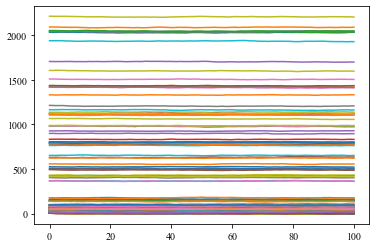

  0%|          | 2/915 [00:00<01:47,  8.51it/s]

Generating for cube


100%|██████████| 915/915 [02:34<00:00,  5.92it/s]


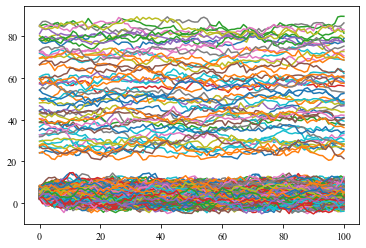

  0%|          | 1/915 [00:00<01:54,  8.00it/s]

Generating for sqt


100%|██████████| 915/915 [02:33<00:00,  5.96it/s]


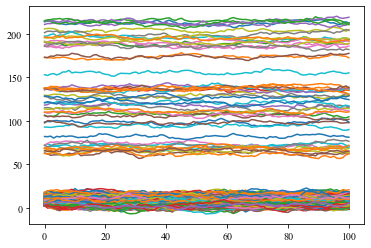

  0%|          | 1/915 [00:00<01:50,  8.27it/s]

Generating for log10


100%|██████████| 915/915 [02:30<00:00,  6.06it/s]


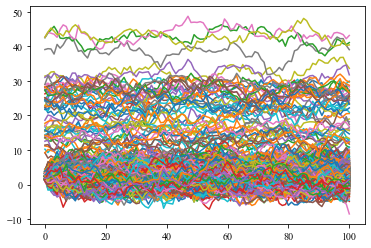

  0%|          | 1/915 [00:00<01:49,  8.32it/s]

Generating for ln


100%|██████████| 915/915 [02:52<00:00,  5.31it/s]


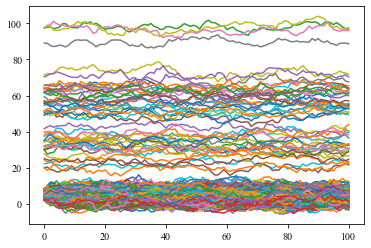

  0%|          | 0/915 [00:00<?, ?it/s]

Generating for log2


100%|██████████| 915/915 [02:41<00:00,  5.66it/s]


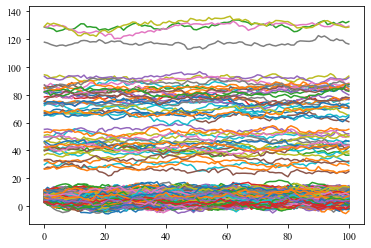

In [3]:
create_non_stationary_data('ARol')

## GARCH
Create non-stationary data using the GARCH model. A series value $x$ at time point $t$ for a <component,failure> group is calculated by:
\begin{align}
x_{t} = n_{t} * \sqrt{ 0.1 + (0.0001 * x_{t-1}^2) + (0.1 * n_{t-1}^2)} + mean_{<component,failure>}
\end{align}

where $n$ is white noise in form of a normal distribution.

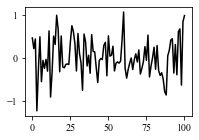

In [2]:
y = du.GARCH(0, 100)
x = range(len(y)) 
plt.figure(figsize=[3, 2])
plt.plot(x, y, color='black')
plt.savefig('data_analysis/04_plots/GARCH_example.pdf') 

  0%|          | 0/915 [00:00<?, ?it/s]

Generating for raw


100%|██████████| 915/915 [02:37<00:00,  5.83it/s]


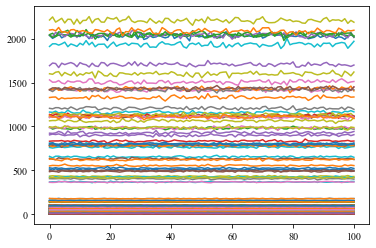

  0%|          | 2/915 [00:00<01:48,  8.39it/s]

Generating for cube


100%|██████████| 915/915 [02:34<00:00,  5.93it/s]


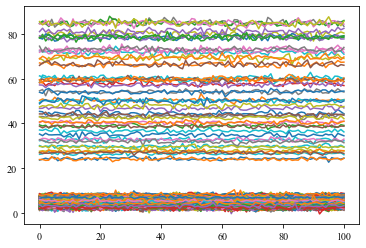

  0%|          | 1/915 [00:00<01:55,  7.88it/s]

Generating for sqt


100%|██████████| 915/915 [02:37<00:00,  5.82it/s]


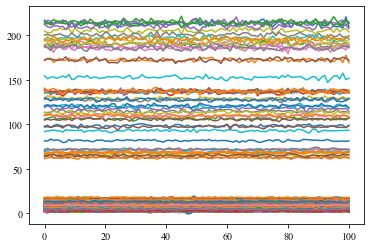

  0%|          | 1/915 [00:00<02:01,  7.51it/s]

Generating for log10


100%|██████████| 915/915 [02:38<00:00,  5.76it/s]


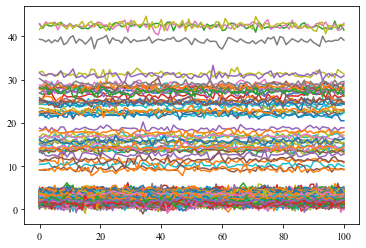

  0%|          | 0/915 [00:00<?, ?it/s]

Generating for ln


100%|██████████| 915/915 [02:43<00:00,  5.60it/s]


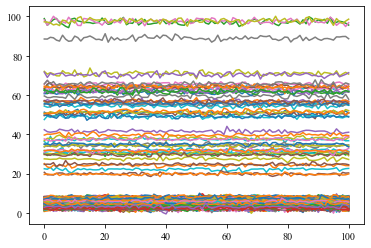

  0%|          | 0/915 [00:00<?, ?it/s]

Generating for log2


100%|██████████| 915/915 [02:48<00:00,  5.42it/s]


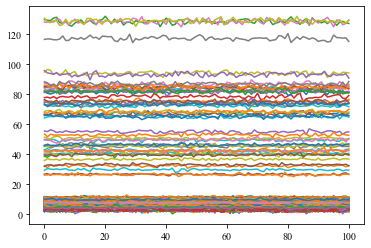

In [5]:
create_non_stationary_data('GARCH')

# T-test

In [5]:
labels = ['Raw', 'Cube Root', 'Square Root', 'Log10', 'Ln',' Log2']
xticks = range(len(labels))

def evaluate_all_datasets(model):
    trans = ['raw', 'cube', 'sqt', 'log10', 'ln', 'log2']
    dist_pairs = {}
    for t in trans:
        dh = DataHandler(data_generation=model, transformation=t)
        result = du.execute_ttest(dh.data)
        dist_pairs[t] = len(result[result['pvalue']<0.05])
    return dist_pairs

## ARol

{'raw': 78, 'cube': 37, 'sqt': 42, 'log10': 19, 'ln': 33, 'log2': 39}


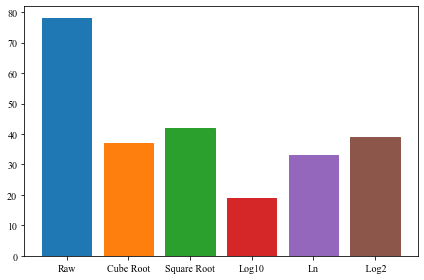

In [6]:
arol_result = evaluate_all_datasets('ARol') 
print(arol_result)
barlist = plt.bar(xticks, [arol_result['raw'], arol_result['cube'], arol_result['sqt'], arol_result['log10'], arol_result['ln'], arol_result['log2']])
barlist[1].set_color('tab:orange')
barlist[2].set_color('tab:green')
barlist[3].set_color('tab:red')
barlist[4].set_color('tab:purple')
barlist[5].set_color('tab:brown')
plt.xticks(xticks, labels)
plt.tight_layout()
plt.savefig('data_analysis/04_plots/ARol_ttest.pdf')

## GARCH

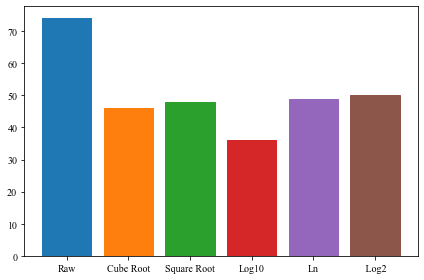

In [7]:
garch_result = evaluate_all_datasets('GARCH') 
barlist = plt.bar(xticks, [garch_result['raw'], garch_result['cube'], garch_result['sqt'], garch_result['log10'], garch_result['ln'], garch_result['log2']])
barlist[1].set_color('tab:orange')
barlist[2].set_color('tab:green')
barlist[3].set_color('tab:red')
barlist[4].set_color('tab:purple')
barlist[5].set_color('tab:brown')
plt.xticks(xticks, labels)
plt.tight_layout()
plt.savefig('data_analysis/04_plots/GARCH_ttest.pdf')